In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [13]:
DATA_PATH = os.path.join(os.getcwd(),'data','data.csv')
df = pd.read_csv(DATA_PATH)
df.head()

,x,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [15]:
df.columns

Index(['x', 'y'], dtype='object')

In [43]:
def draw_line(x,y):
    plt.plot(x,y)
    plt.show()
def draw_scatter(x,y):
    plt.scatter(x,y)
    plt.show()

def draw_scatter_line(x,y_true,y_predict):
    plt.scatter(x,y_true)
    plt.plot(x,y_predict,c='r')
    plt.show()

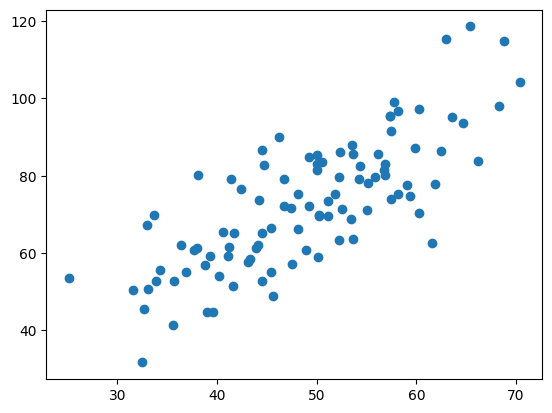

In [25]:
x = df['x']
y_true= df['y']
draw_scatter(x,y_true)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       100 non-null    float64
 1   y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


## Linear Rgeression

In [33]:
x2dim = x.values.reshape(-1,1)

In [34]:
from sklearn.linear_model import LinearRegression

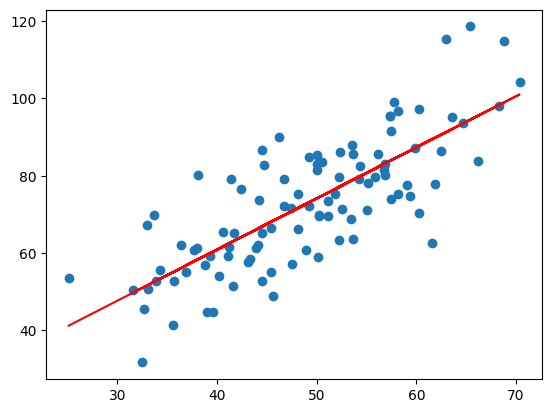

In [45]:
lr = LinearRegression()
lr.fit(x2dim,y_true)

y_predict = lr.predict(x2dim)

draw_scatter_line(x,y_true,y_predict)

### Evaluate Alogorith , Accuracy

In [46]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [47]:
print(f'mean absolute error : {mean_absolute_error(y_true,y_predict)}')
print(f'mean square derror : {mean_squared_error(y_true,y_predict)}')
print(f'Accuracy , r2 score : {r2_score(y_true,y_predict)}')

mean absolute error : 8.301392283737504
mean square derror : 110.25738344912885
Accuracy , r2 score : 0.5986557915661921


# Observation
- **Accuracy too poor , not good**

### using polynomial Features to optimize alogorithm accuracy

In [48]:
from sklearn.preprocessing import PolynomialFeatures

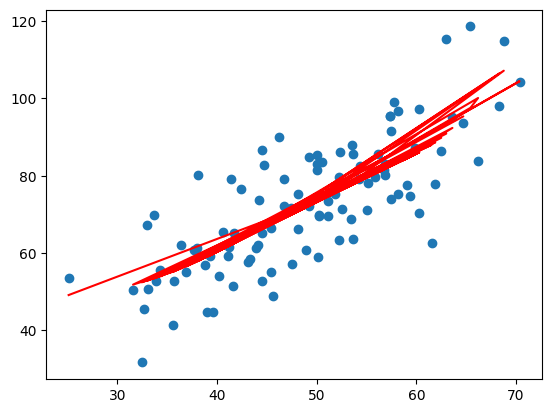

In [62]:
poly = PolynomialFeatures(degree=15)
x2dim_poly = poly.fit_transform(x2dim)

lr = LinearRegression()
lr.fit(x2dim_poly,y_true)

y_predict = lr.predict(x2dim_poly)

draw_scatter_line(x,y_true,y_predict)

In [63]:
print(f'mean absolute error : {mean_absolute_error(y_true,y_predict)}')
print(f'mean square derror : {mean_squared_error(y_true,y_predict)}')
print(f'Accuracy , r2 score : {r2_score(y_true,y_predict)}')

mean absolute error : 8.188732374863944
mean square derror : 106.94092751301905
Accuracy , r2 score : 0.6107279117348855


# Observation
- **Accuracy Now became alittle good , but still not good enough**

### Try To Scale x and y 

In [65]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

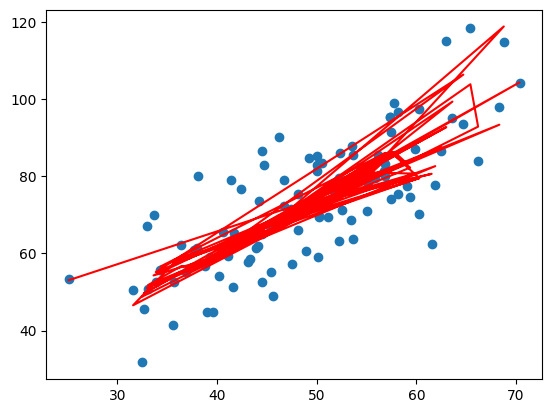

In [73]:
poly = PolynomialFeatures(degree=15)
x2dim_poly = poly.fit_transform(x2dim)

scl = StandardScaler()
x2dim_scaled = scl.fit_transform(x2dim_poly)

lr = LinearRegression()
lr.fit(x2dim_scaled,y_true)

y_predict = lr.predict(x2dim_scaled)

draw_scatter_line(x,y_true,y_predict)

In [74]:
print(f'mean absolute error : {mean_absolute_error(y_true,y_predict)}')
print(f'mean square derror : {mean_squared_error(y_true,y_predict)}')
print(f'Accuracy , r2 score : {r2_score(y_true,y_predict)}')

mean absolute error : 7.8960114511292625
mean square derror : 95.83074791240045
Accuracy , r2 score : 0.6511697043648097


### Now Faceing UnderFit Problem , Let's Try To Fix This problem , using Lass , Ridg Regressor

In [75]:
from sklearn.linear_model import Lasso,Ridge

C:\Shalgham\Python\envs\electroai_svp\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.18008e-40): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


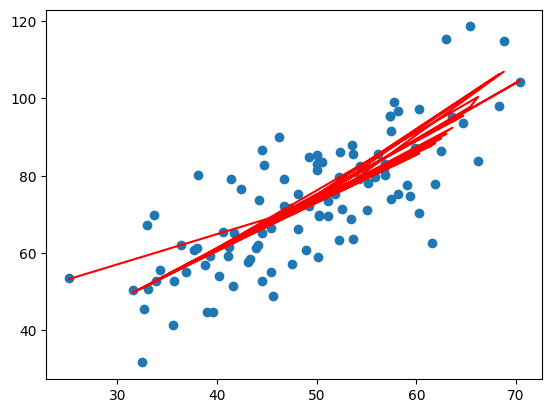

mean absolute error : 8.13632983512928
mean square derror : 106.54719483362443
Accuracy , r2 score : 0.6121611248731155


In [91]:
poly = PolynomialFeatures(degree=10)
x2dim_poly = poly.fit_transform(x2dim)

lr = Ridge(alpha=0.01)
lr.fit(x2dim_poly,y_true)

y_predict = lr.predict(x2dim_poly)

draw_scatter_line(x,y_true,y_predict)

print(f'mean absolute error : {mean_absolute_error(y_true,y_predict)}')
print(f'mean square derror : {mean_squared_error(y_true,y_predict)}')
print(f'Accuracy , r2 score : {r2_score(y_true,y_predict)}')


### Gradient Descent

In [93]:
from sklearn.linear_model import SGDRegressor

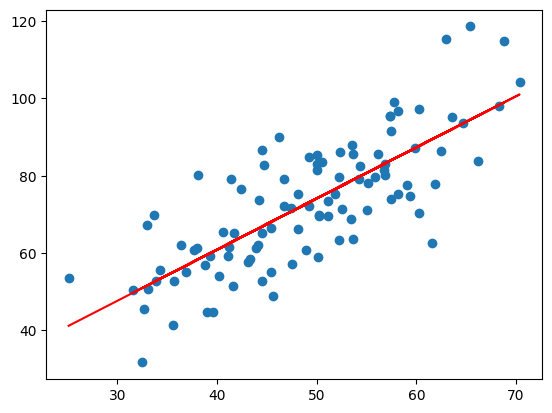

mean absolute error : 8.299754274247668
mean square derror : 110.25762594030292
Accuracy , r2 score : 0.5986549088821915


In [96]:

scl = StandardScaler()
x2dim_scl = scl.fit_transform(x2dim)

lr = SGDRegressor()
lr.fit(x2dim_scl,y_true)

y_predict = lr.predict(x2dim_scl)

draw_scatter_line(x,y_true,y_predict)

print(f'mean absolute error : {mean_absolute_error(y_true,y_predict)}')
print(f'mean square derror : {mean_squared_error(y_true,y_predict)}')
print(f'Accuracy , r2 score : {r2_score(y_true,y_predict)}')

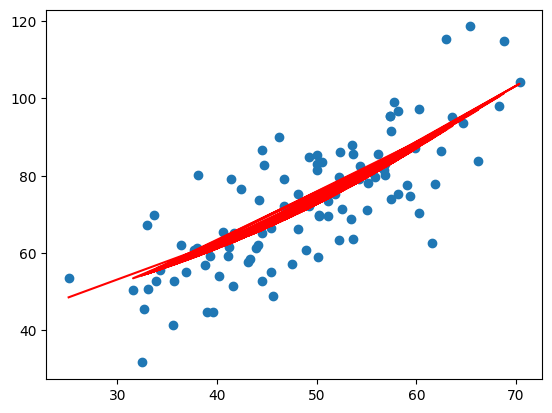

mean absolute error : 8.258271947281301
mean square derror : 109.08140997762563
Accuracy , r2 score : 0.6029364132107042


In [97]:

poly = PolynomialFeatures(degree=10)
x2dim_poly = poly.fit_transform(x2dim)

scl = StandardScaler()
x2dim_scl = scl.fit_transform(x2dim_poly)

lr = SGDRegressor()
lr.fit(x2dim_scl,y_true)

y_predict = lr.predict(x2dim_scl)

draw_scatter_line(x,y_true,y_predict)

print(f'mean absolute error : {mean_absolute_error(y_true,y_predict)}')
print(f'mean square derror : {mean_squared_error(y_true,y_predict)}')
print(f'Accuracy , r2 score : {r2_score(y_true,y_predict)}')

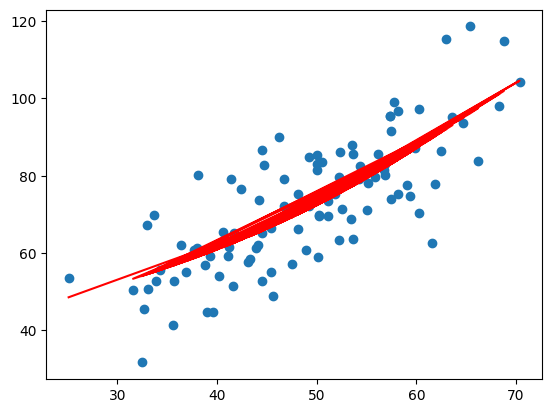

mean absolute error : 8.243921836300647
mean square derror : 109.04968465392544
Accuracy , r2 score : 0.603051895498869


In [104]:

poly = PolynomialFeatures(degree=10)
x2dim_poly = poly.fit_transform(x2dim)

scl = StandardScaler()
x2dim_scl = scl.fit_transform(x2dim_poly)

lr = SGDRegressor(max_iter = 100)
lr.fit(x2dim_scl,y_true)

y_predict = lr.predict(x2dim_scl)

draw_scatter_line(x,y_true,y_predict)

print(f'mean absolute error : {mean_absolute_error(y_true,y_predict)}')
print(f'mean square derror : {mean_squared_error(y_true,y_predict)}')
print(f'Accuracy , r2 score : {r2_score(y_true,y_predict)}')

# Another Eample For More Explanation

In [105]:
DATA_PATH = os.path.join(os.getcwd(),'data','X_Y_Sinusoid_Dataset.csv')
df = pd.read_csv(DATA_PATH)
df.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       20 non-null     float64
 1   y       20 non-null     float64
dtypes: float64(2)
memory usage: 452.0 bytes


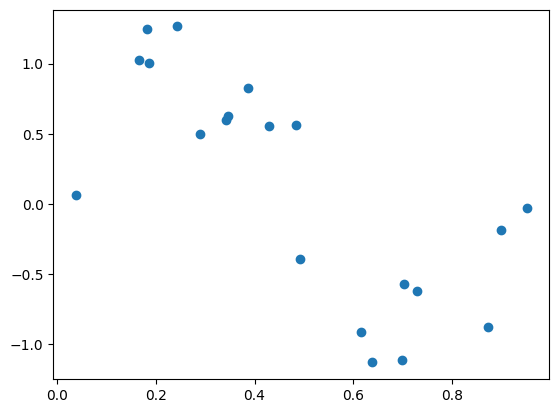

In [107]:
x = df['x']
y_true= df['y']
draw_scatter(x,y_true)

In [108]:
x2dim = x.values.reshape(-1,1)

In [109]:
x2dim

array([[0.03857092],
       [0.16677635],
       [0.18315273],
       [0.18735865],
       [0.24311568],
       [0.28929928],
       [0.34280523],
       [0.34549864],
       [0.38647717],
       [0.43004681],
       [0.48449846],
       [0.49192894],
       [0.61493248],
       [0.63805398],
       [0.69773639],
       [0.70242742],
       [0.72908562],
       [0.87340084],
       [0.89800712],
       [0.95096403]])

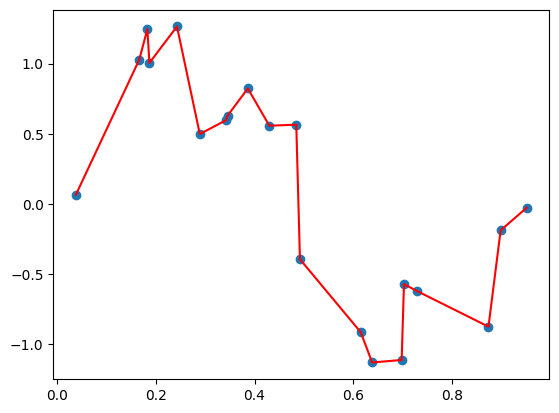

mean absolute error : 1.8302060188718147e-05
mean square derror : 7.290336409695508e-10
Accuracy , r2 score : 0.9999999988075592


In [113]:
poly = PolynomialFeatures(degree=50)
x2dim_poly = poly.fit_transform(x2dim)

lr = LinearRegression()
lr.fit(x2dim_poly,y_true)

y_predict = lr.predict(x2dim_poly)

draw_scatter_line(x,y_true,y_predict)

print(f'mean absolute error : {mean_absolute_error(y_true,y_predict)}')
print(f'mean square derror : {mean_squared_error(y_true,y_predict)}')
print(f'Accuracy , r2 score : {r2_score(y_true,y_predict)}')

### Offerfitting problem Here 

C:\Shalgham\Python\envs\electroai_svp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.109e-01, tolerance: 1.223e-03
  model = cd_fast.enet_coordinate_descent(


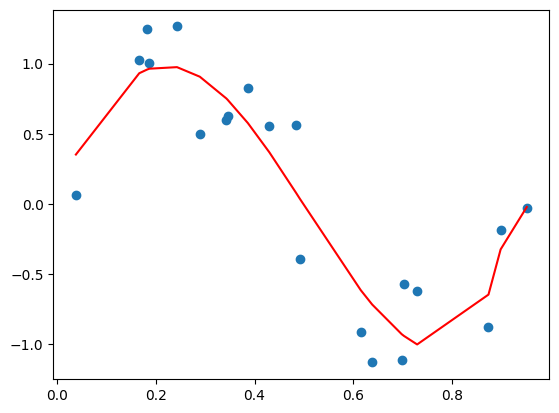

C:\Shalgham\Python\envs\electroai_svp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.801e-01, tolerance: 1.223e-03
  model = cd_fast.enet_coordinate_descent(


mean absolute error : 0.252130963461749
mean square derror : 0.08130050110792483
Accuracy , r2 score value is : 0.8670211829295618 ,  when alpha value is 1e-06 


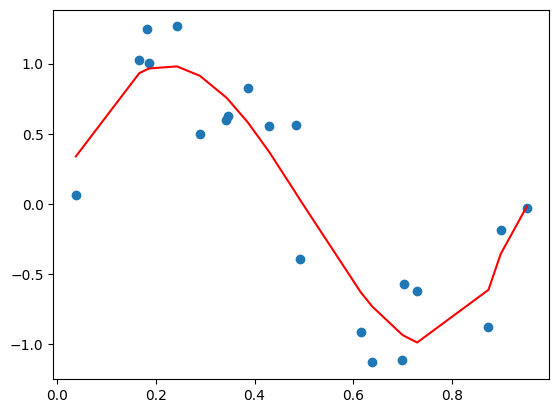

mean absolute error : 0.25302574226437835
mean square derror : 0.08082991049227227
Accuracy , r2 score value is : 0.8677909024582379 ,  when alpha value is 1e-05 


C:\Shalgham\Python\envs\electroai_svp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.097e-01, tolerance: 1.223e-03
  model = cd_fast.enet_coordinate_descent(


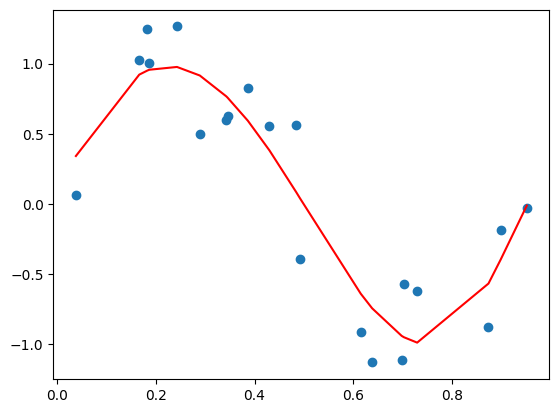

mean absolute error : 0.2577478369848057
mean square derror : 0.0825487351505858
Accuracy , r2 score value is : 0.8649795142539928 ,  when alpha value is 0.0001 


C:\Shalgham\Python\envs\electroai_svp\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.041e-02, tolerance: 1.223e-03
  model = cd_fast.enet_coordinate_descent(


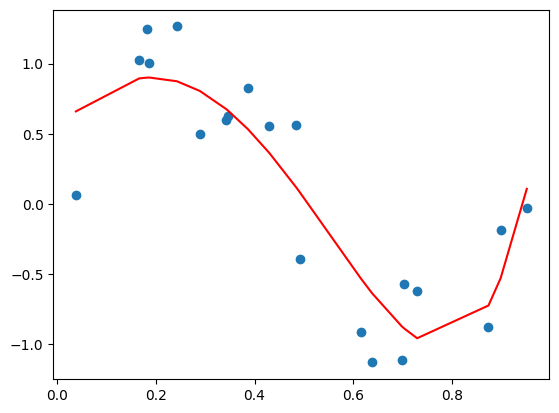

mean absolute error : 0.2893864196258551
mean square derror : 0.1058465954065431
Accuracy , r2 score value is : 0.8268724687267225 ,  when alpha value is 0.001 


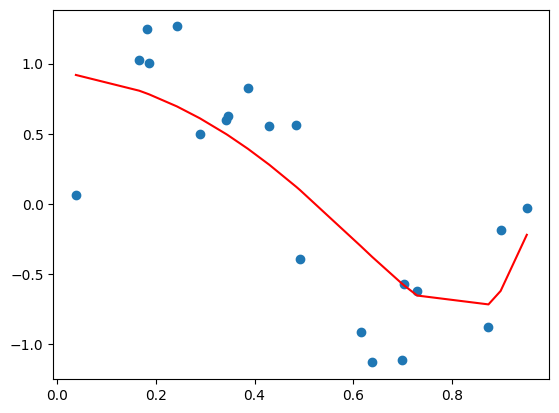

mean absolute error : 0.35270752602386335
mean square derror : 0.17964141818527984
Accuracy , r2 score value is : 0.7061702823279907 ,  when alpha value is 0.01 


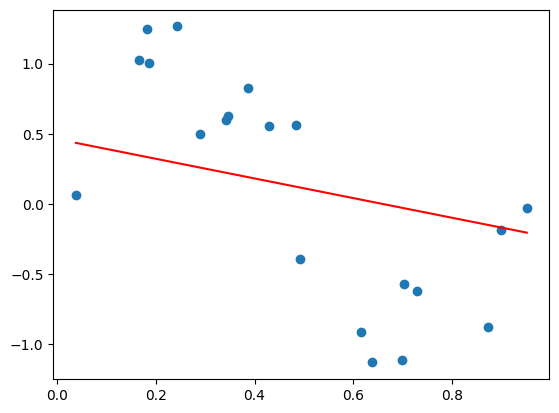

mean absolute error : 0.5909201206839658
mean square derror : 0.43787243434370504
Accuracy , r2 score value is : 0.28379582470859765 ,  when alpha value is 0.1 


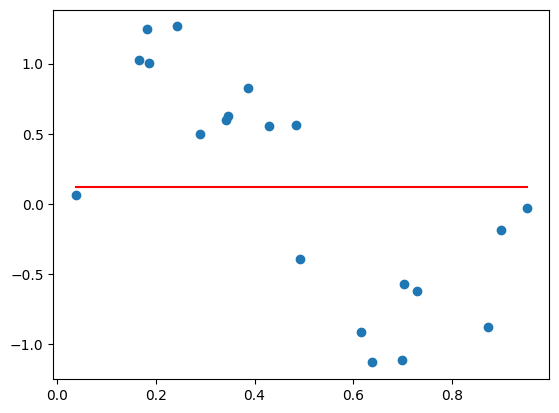

mean absolute error : 0.6983884518947276
mean square derror : 0.6113793376945166
Accuracy , r2 score value is : 0.0 ,  when alpha value is 1 


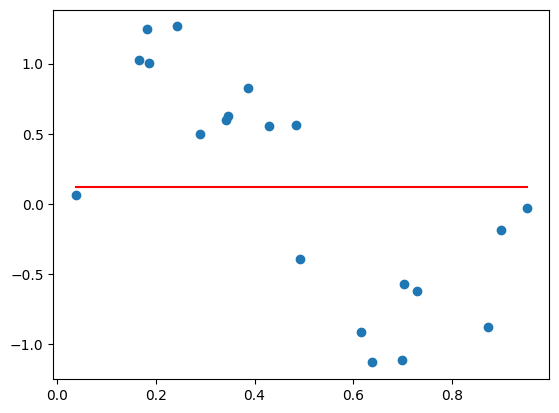

mean absolute error : 0.6983884518947276
mean square derror : 0.6113793376945166
Accuracy , r2 score value is : 0.0 ,  when alpha value is 10 


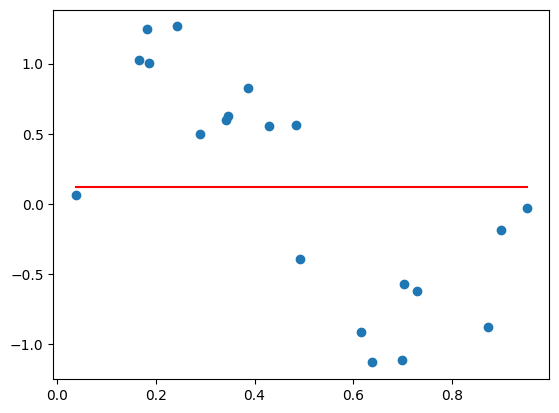

mean absolute error : 0.6983884518947276
mean square derror : 0.6113793376945166
Accuracy , r2 score value is : 0.0 ,  when alpha value is 100 


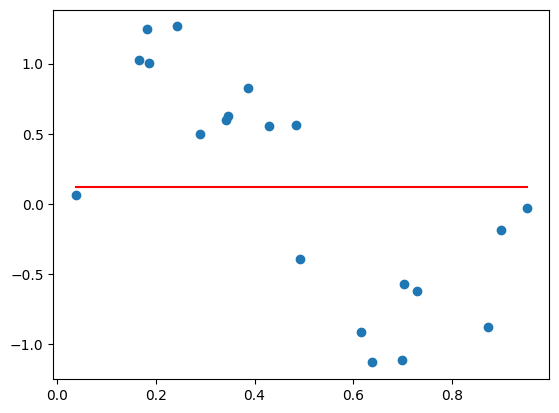

mean absolute error : 0.6983884518947276
mean square derror : 0.6113793376945166
Accuracy , r2 score value is : 0.0 ,  when alpha value is 1000 


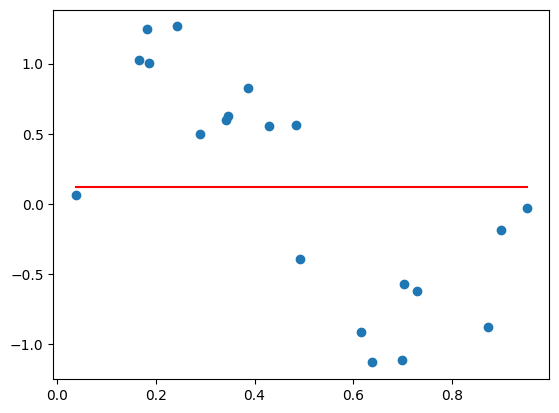

mean absolute error : 0.6983884518947276
mean square derror : 0.6113793376945166
Accuracy , r2 score value is : 0.0 ,  when alpha value is 10000 


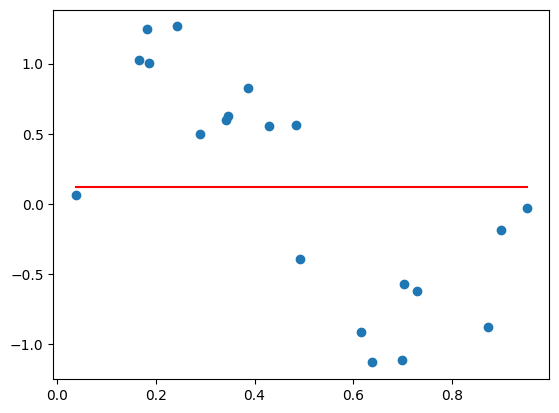

mean absolute error : 0.6983884518947276
mean square derror : 0.6113793376945166
Accuracy , r2 score value is : 0.0 ,  when alpha value is 100000 


In [116]:
alphas = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
for alpha in alphas:
    
    poly = PolynomialFeatures(degree=50)
    x2dim_poly = poly.fit_transform(x2dim)
    
    lr = Lasso(alpha=alpha)
    lr.fit(x2dim_poly,y_true)
    
    y_predict = lr.predict(x2dim_poly)
    
    draw_scatter_line(x,y_true,y_predict)

    print(f'mean absolute error : {mean_absolute_error(y_true,y_predict)}')
    print(f'mean square derror : {mean_squared_error(y_true,y_predict)}')
    print(f'Accuracy , r2 score value is : {r2_score(y_true,y_predict)} ,  when alpha value is {alpha} ')

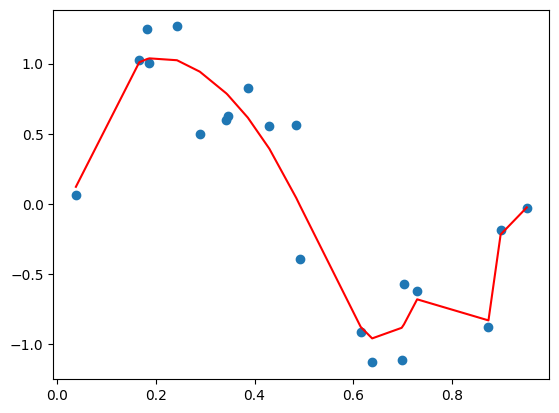

mean absolute error : 0.17391512665636968
mean square derror : 0.051186398839129565
Accuracy , r2 score value is : 0.9162771855651008 ,  when alpha value is 1e-06 


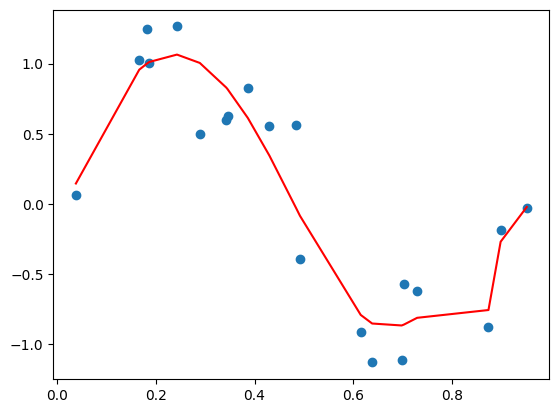

mean absolute error : 0.20919842857722407
mean square derror : 0.06443287619097872
Accuracy , r2 score value is : 0.8946106415143957 ,  when alpha value is 1e-05 


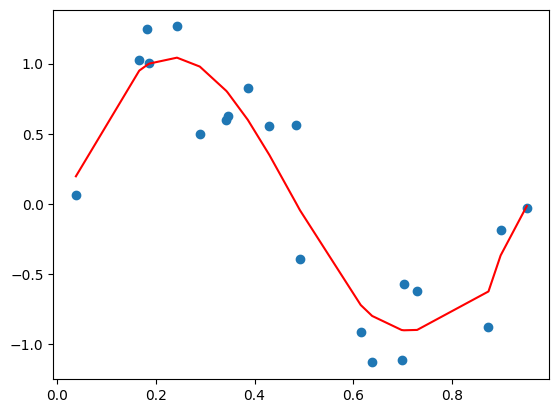

mean absolute error : 0.23349441823769923
mean square derror : 0.0720308894345194
Accuracy , r2 score value is : 0.8821829836347683 ,  when alpha value is 0.0001 


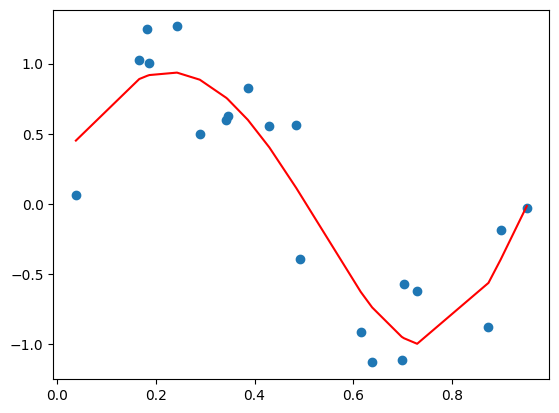

mean absolute error : 0.2682327626472525
mean square derror : 0.08843442152027338
Accuracy , r2 score value is : 0.8553526165052363 ,  when alpha value is 0.001 


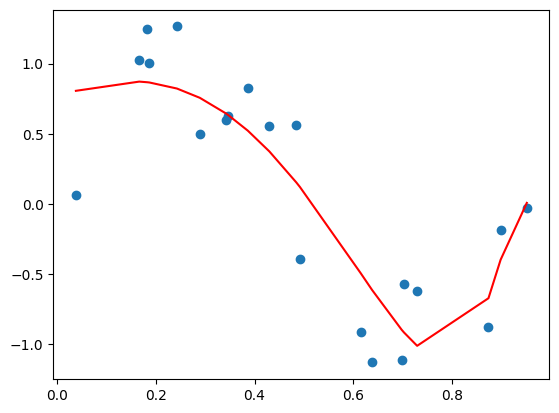

mean absolute error : 0.29528884324059235
mean square derror : 0.11998812863782479
Accuracy , r2 score value is : 0.8037419303532656 ,  when alpha value is 0.01 


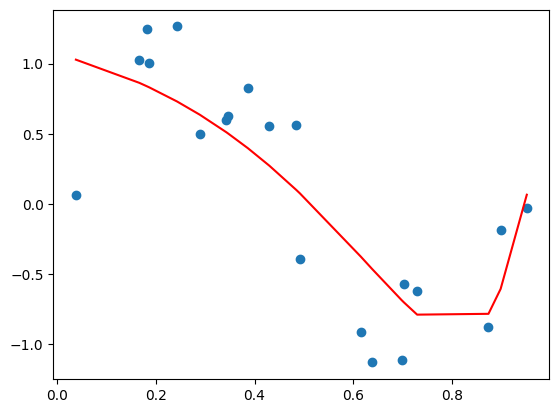

mean absolute error : 0.338136806342249
mean square derror : 0.16616545841005734
Accuracy , r2 score value is : 0.728212178323429 ,  when alpha value is 0.1 


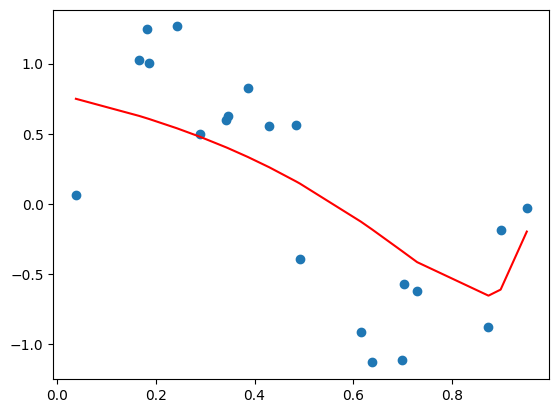

mean absolute error : 0.438620167158871
mean square derror : 0.2529380843478746
Accuracy , r2 score value is : 0.5862829036687884 ,  when alpha value is 1 


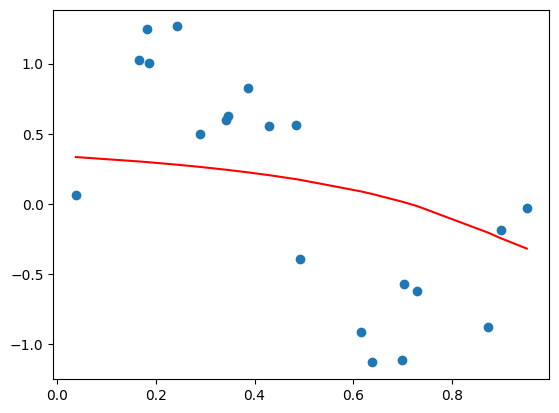

mean absolute error : 0.6022146583231754
mean square derror : 0.46018708945493475
Accuracy , r2 score value is : 0.24729695447301325 ,  when alpha value is 10 


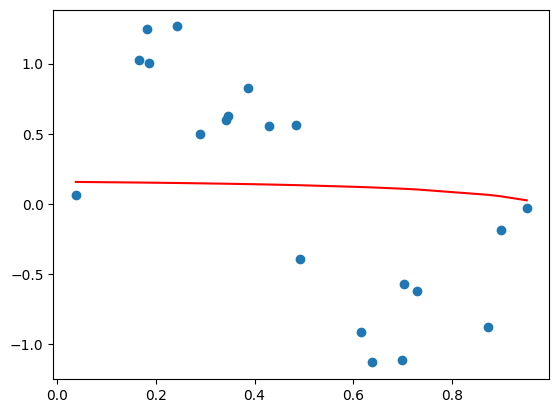

mean absolute error : 0.6754114793392084
mean square derror : 0.5820218519492824
Accuracy , r2 score value is : 0.04801844605337824 ,  when alpha value is 100 


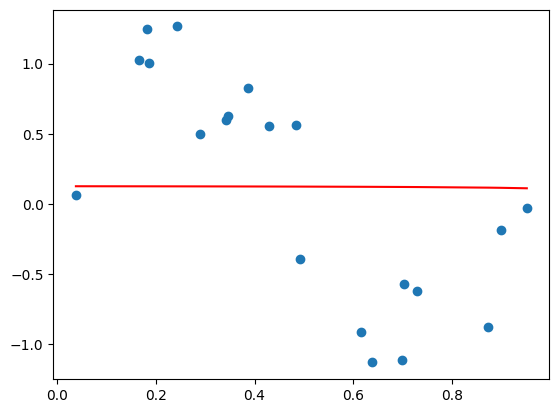

mean absolute error : 0.695882867001823
mean square derror : 0.6080874883474665
Accuracy , r2 score value is : 0.005384299311559149 ,  when alpha value is 1000 


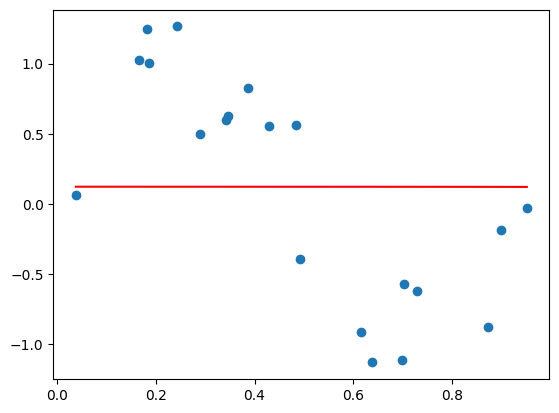

mean absolute error : 0.6981355798939759
mean square derror : 0.6110460595483566
Accuracy , r2 score value is : 0.0005451249749734988 ,  when alpha value is 10000 


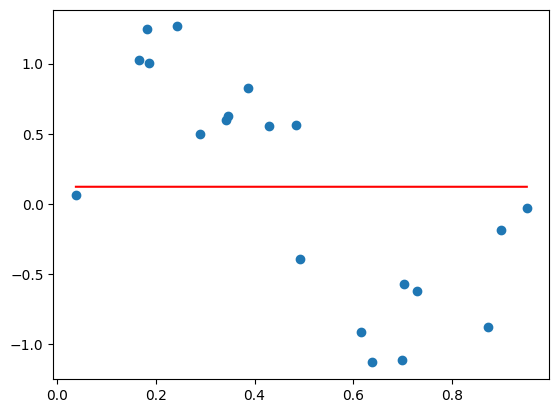

mean absolute error : 0.698363141297786
mean square derror : 0.6113459683383791
Accuracy , r2 score value is : 5.458044470951773e-05 ,  when alpha value is 100000 


In [117]:
alphas = [0.000001,0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]
for alpha in alphas:
    
    poly = PolynomialFeatures(degree=50)
    x2dim_poly = poly.fit_transform(x2dim)
    
    lr = Ridge(alpha=alpha)
    lr.fit(x2dim_poly,y_true)
    
    y_predict = lr.predict(x2dim_poly)
    
    draw_scatter_line(x,y_true,y_predict)

    print(f'mean absolute error : {mean_absolute_error(y_true,y_predict)}')
    print(f'mean square derror : {mean_squared_error(y_true,y_predict)}')
    print(f'Accuracy , r2 score value is : {r2_score(y_true,y_predict)} ,  when alpha value is {alpha} ')

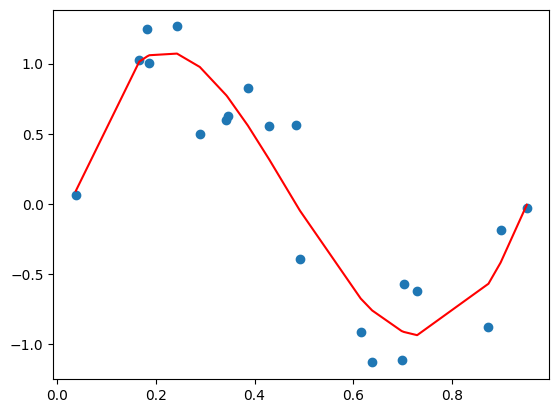

mean absolute error : 0.23586918782809327
mean square derror : 0.07625963807756013
Accuracy , r2 score value is : 0.8752662489950482 ,  when alpha value is 100000 


In [147]:
scl = StandardScaler()
x2dim_scl = scl.fit_transform(x2dim)

poly = PolynomialFeatures(degree=5)
x2dim_poly = poly.fit_transform(x2dim_scl)

sgdr = Ridge(alpha=0.0001)
sgdr.fit(x2dim_poly,y_true)

y_predict = sgdr.predict(x2dim_poly)

draw_scatter_line(x,y_true,y_predict)

print(f'mean absolute error : {mean_absolute_error(y_true,y_predict)}')
print(f'mean square derror : {mean_squared_error(y_true,y_predict)}')
print(f'Accuracy , r2 score value is : {r2_score(y_true,y_predict)} ,  when alpha value is {alpha} ')